# Python WebCam

In [1]:
%matplotlib inline

import cv2
import numpy as np # not acctually used, just good practice ;)
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
from torchvision import transforms

In [2]:
#!pip install torchvision==0.1.8

In [3]:
vc = cv2.VideoCapture(0)
vc

<VideoCapture 0x11ea03fb0>

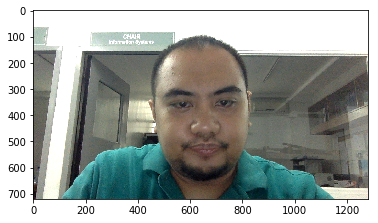

In [5]:
if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

In [6]:
# Here we create two transforms.
# In the first we demonstrate doing pre-transform on picture and then convert it to a tensor.
# The second is just a convenient way to get the tensor back into an image.
image_to_tensor = transforms.Compose([
    #transforms.ColorJitter(brightness=0.5, hue=0.4),
    transforms.ToTensor()
    ])

tensor_to_image = transforms.Compose([
  transforms.ToPILImage()  
])


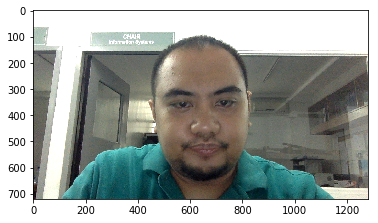

In [7]:
plt.imshow(frame)

In [8]:
import numpy as np
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

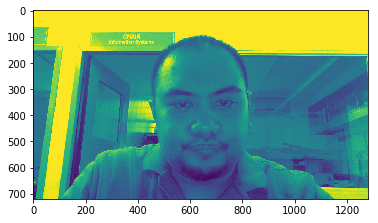

In [9]:
plt.imshow(gray)

In [10]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [11]:
faces

array([[442, 193, 420, 420]], dtype=int32)

In [12]:
for (x,y,w,h) in faces:
    cv2.imwrite("Face.jpg", gray[y:y+h+30,x:x+w+20])

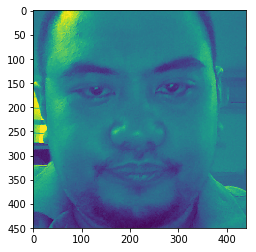

In [13]:
cropped = plt.imread('Face.jpg')
plt.imshow(cropped)

In [29]:
eyes = eye_cascade.detectMultiScale(cropped)

In [30]:
eyes

array([[ 82, 120,  95,  95],
       [240, 117,  95,  95]], dtype=int32)

In [31]:
roi_color = gray[y:y+h+30,x:x+w+20]

In [32]:
import PIL
from PIL import Image
eye_counter = 0
for (ex,ey,ew,eh) in eyes:
    
    # here's your eye-roi, see, it's the very same pattern
    roi_color_eye = cropped[ey:ey+eh, ex:ex+ew]
    # write image *before* drawing stuff on it
    cv2.imwrite("eye_%d.png" % eye_counter, roi_color_eye)
    eye_counter += 1


In [37]:
basewidth = 30
img1 = Image.open('eye_0.png')

img1 = img1.resize((30, 30), PIL.Image.ANTIALIAS)
img1.save('eye_0.png')

img2 = Image.open('eye_1.png')
#img = Image.open('eye_0.png')
#wpercent = (basewidth / float(img.size[0]))
#hsize = int((float(img.size[1]) * float(wpercent)))
img2 = img2.resize((30, 30), PIL.Image.ANTIALIAS)
img2.save('eye_1.png')

# The loading of images part

In [207]:
left = plt.imread('eye_0.png')
right = plt.imread('eye_1.png')

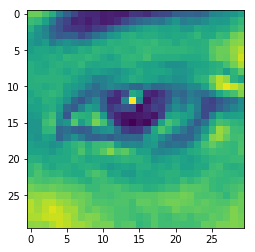

In [208]:
plt.imshow(right)

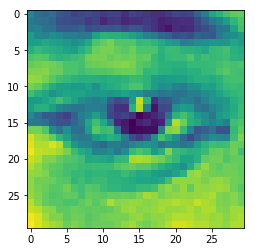

In [209]:
plt.imshow(left)

In [138]:
merge = np.concatenate((left,right),axis=1)

In [139]:
merge.ndim

2

In [140]:
# stacking them to 3d
training = np.dstack((left, right))

In [142]:
training

array([[[ 0.26666668,  0.39607844],
        [ 0.23137255,  0.39607844],
        [ 0.22352941,  0.36862746],
        ..., 
        [ 0.35294119,  0.29019609],
        [ 0.36862746,  0.3019608 ],
        [ 0.37254903,  0.32156864]],

       [[ 0.25098041,  0.36078432],
        [ 0.23921569,  0.35294119],
        [ 0.23529412,  0.31764707],
        ..., 
        [ 0.3019608 ,  0.30980393],
        [ 0.33725491,  0.33725491],
        [ 0.35686275,  0.35294119]],

       [[ 0.25882354,  0.34117648],
        [ 0.26274511,  0.3019608 ],
        [ 0.23921569,  0.27058825],
        ..., 
        [ 0.24705882,  0.33333334],
        [ 0.30980393,  0.35294119],
        [ 0.35294119,  0.36862746]],

       ..., 
       [[ 0.42745098,  0.43921569],
        [ 0.41960785,  0.42745098],
        [ 0.39607844,  0.44313726],
        ..., 
        [ 0.3882353 ,  0.3882353 ],
        [ 0.40392157,  0.40784314],
        [ 0.40392157,  0.39607844]],

       [[ 0.44705883,  0.43529412],
        [ 0.43529412,  

In [141]:
training.shape

(30, 30, 2)

In [171]:
# needs to be transposed to fit the tensorflow
training_T = training.T

In [48]:
merge.shape

(60, 30)

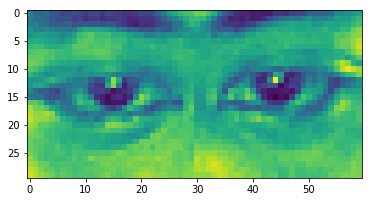

In [80]:
#showing the possible training data for eyes
plt.imshow(merge)

In [226]:
labels = np.array([0,1])

In [227]:
labels.shape

(2,)

# Flatten the data first for Simple Machine Learning

In [228]:
class_names = ['Left', 'Right']

In [229]:
left_1 = left.flatten()

In [230]:
right_2 = right.flatten()

In [231]:
print (left.shape, right.shape)

(30, 30) (30, 30)


In [232]:
train1 = np.vstack((left_1, right_2))

In [233]:
train1.shape

(2, 900)

In [234]:
X = train1
y = labels

# Machine Learning Part

Using SVM Classifier

In [235]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
result = clf.predict(X[0])

/Users/dadidelux/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [237]:
# restore flatten row
predicted_image = X[0].reshape(30, 30)

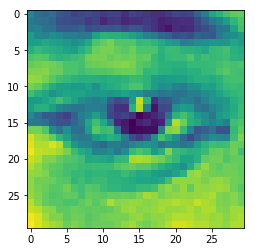

In [224]:
plt.imshow(predicted_image)

In [241]:
print(class_names[int(result)], "eye")

Left eye


# Tensorflow Part

In [176]:
X = training_T / 255.0
y = labels

In [177]:
X

array([[[ 0.00104575,  0.00098424,  0.00101499, ...,  0.00167628,
          0.00175317,  0.00178393],
        [ 0.00090734,  0.0009381 ,  0.00103037, ...,  0.00164552,
          0.00170704,  0.00170704],
        [ 0.00087659,  0.00092272,  0.0009381 , ...,  0.00155325,
          0.00159938,  0.00164552],
        ..., 
        [ 0.00138408,  0.00118416,  0.00096886, ...,  0.00152249,
          0.00153787,  0.00155325],
        [ 0.0014456 ,  0.00132257,  0.00121492, ...,  0.00158401,
          0.00158401,  0.00161476],
        [ 0.00146098,  0.00139946,  0.00138408, ...,  0.00158401,
          0.00161476,  0.00161476]],

       [[ 0.00155325,  0.00141484,  0.00133795, ...,  0.00172241,
          0.00170704,  0.00163014],
        [ 0.00155325,  0.00138408,  0.00118416, ...,  0.00167628,
          0.00170704,  0.00164552],
        [ 0.0014456 ,  0.00124567,  0.00106113, ...,  0.00173779,
          0.00175317,  0.00163014],
        ..., 
        [ 0.00113802,  0.00121492,  0.00130719, ...,

In [178]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(30, 30)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=5)


Epoch 1/5
2/2 [==============================] - 0s 144ms/step - loss: 2.3015 - acc: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 0s 5ms/step - loss: 2.2901 - acc: 0.5000
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 2.2777 - acc: 0.5000
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 2.2640 - acc: 1.0000
Epoch 5/5
2/2 [==============================] - 0s 9ms/step - loss: 2.2564 - acc: 1.0000


In [180]:
test_loss , test_acc = model.evaluate(X, y)

2/2 [==============================] - 0s 1ms/step


In [181]:
test_acc

1.0

In [183]:
predictions = model.predict(X)

In [184]:
predictions

array([[ 0.09769444,  0.10614125,  0.10603585,  0.09773415,  0.09929064,
         0.09864145,  0.09875288,  0.09848204,  0.09837072,  0.09885666],
       [ 0.09764817,  0.10608061,  0.10612132,  0.097762  ,  0.09926977,
         0.09865258,  0.09875494,  0.09848169,  0.09834044,  0.09888851]], dtype=float32)

In [192]:
np.argmax(predictions[1])

2

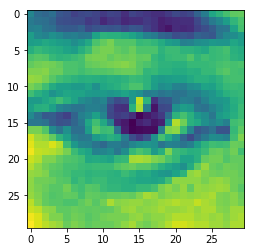

In [196]:
# shows the classification image
plt.imshow(X[0].T)